# Marginal 1-dim posteriors from image data

- Using SWYFT core functions (i.e. look at swyft/core.py)
- Demonstrates `head` network

Author: Christoph Weniger and Benjamin Miller, August 2020

In [168]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
%load_ext autoreload
%autoreload 2

np.random.seed(25)
torch.manual_seed(25)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [169]:
DEVICE = 'cuda:0'
NDIM = 2 # number of parameters
NBINS = 1000
SIGMA = 0.01

In [170]:
# A toy model with a diffuse and point source component

def model(z, sigma = SIGMA, w = 0.4):
    x = z + np.random.randn(2)*sigma + (np.random.rand(2)-0.5)*w
    return x

In [171]:
z0 = np.array([0.5, 0.5])
x0 = model(z0)
print(x0)

[0.41381831 0.3846334 ]


In [176]:
ds = swyft.DataStoreZarr("/home/ubuntu/volume1/z7")
ds.init(zdim = 2, xdim = (2,))

Creating empty datastore: /home/ubuntu/volume1/z7
...don't forget to run `init` to set up storage parameters.
Datastore initialized.


In [177]:
# Instantiate network
sw = swyft.SWYFT(x0, model, zdim = 2, device = DEVICE, head = None, datastore = ds)

In [178]:
sw.advance_train_history(nsamples = 5000)

Adding 4925 new samples. Run simulator!


In [179]:
if sw.requires_sim():
    for i in ds.require_sim():
        z = ds.z[i]
        x = model(z)
        ds.add_sim(i, x)

In [180]:
sw.advance_net1d_history()

In [182]:
sw.train1d(max_epochs = 1)

Start training
LR iteration 0
Total epochs: 1
Validation losses: [3.4445192366838455]
LR iteration 1
Total epochs: 1
Validation losses: [3.3049078211188316]
LR iteration 2
Total epochs: 1
Validation losses: [3.2991166934370995]


In [183]:
sw.advance_post1d_history()

In [184]:
print(len(sw.train_history), len(sw.net1d_history), len(sw.post1d_history))

1 1 1


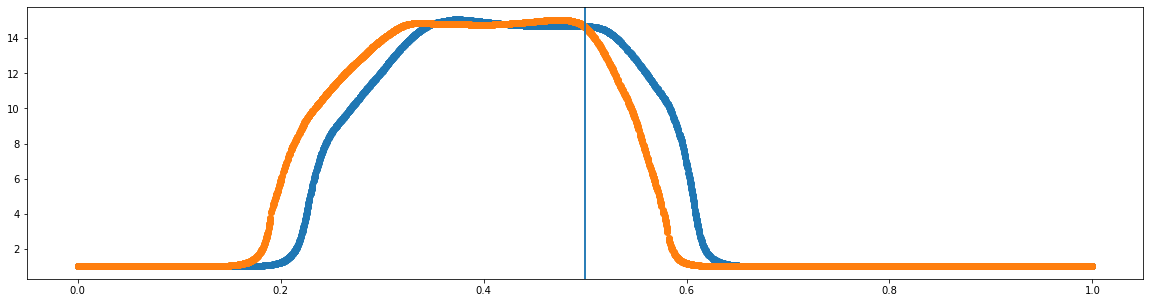

In [185]:
plt.figure(figsize=(20, 5))
for i in range(2):
    zgrid, lnLgrid = sw.posterior(i)
    plt.axvline(z0[i])
    plt.scatter(zgrid[:], np.exp(lnLgrid[:]))

In [224]:
sw.advance_train_history(nsamples = 5000)

Adding 2038 new samples. Run simulator!


In [225]:
if sw.requires_sim():
    for i in ds.require_sim():
        z = ds.z[i]
        x = model(z)
        ds.add_sim(i, x)

In [226]:
sw.advance_net1d_history()

In [227]:
sw.train1d(max_epochs = 1)

Start training
LR iteration 0
Total epochs: 1
Validation losses: [3.8602562621235847]
LR iteration 1
Total epochs: 1
Validation losses: [3.6605110839009285]
LR iteration 2
Total epochs: 1
Validation losses: [3.65358579903841]


In [228]:
sw.advance_post1d_history()

In [229]:
print(len(sw.train_history), len(sw.net1d_history), len(sw.post1d_history))

2 2 2


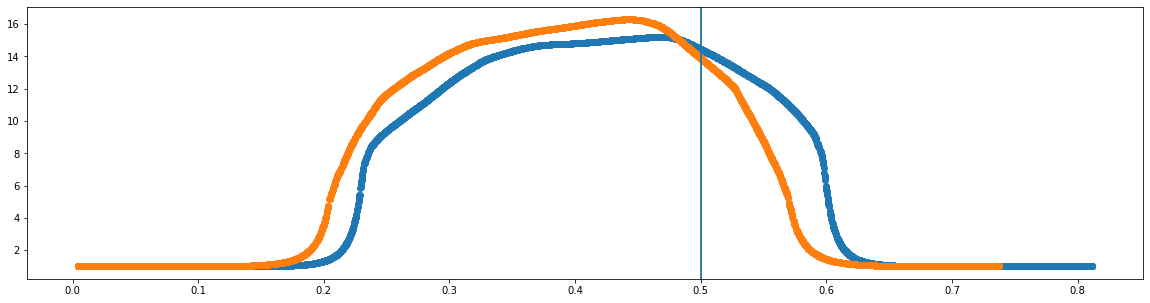

In [233]:
plt.figure(figsize=(20, 5))
for i in range(2):
    zgrid, lnLgrid = sw.posterior(i, version = -1)
    plt.axvline(z0[i])
    plt.scatter(zgrid[:], np.exp(lnLgrid[:]))

In [58]:
sw.comb([[0, 1]], max_epochs = 5)

100%|██████████| 469/469 [00:00<00:00, 642.21it/s]


In [62]:
zgrid, lnLgrid = sw.posterior([0, 1])
plt.scatter(zgrid[:,0], zgrid[:,1], marker='.', color='0.8')
max_lnL = lnLgrid[:].max()
plt.tricontour(zgrid[:,0], zgrid[:,1], -lnLgrid+max_lnL, levels = [1, 4, 9])
plt.xlim([0, 1])
plt.ylim([0, 1])

TypeError: cannot unpack non-iterable NoneType object